<a href="https://colab.research.google.com/github/abidahnisaa/Project_Inbio_TBC_MachineLearning/blob/main/best_model_dan_Perhitungan_fitur_penting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving hasil_fingerprint.xlsx to hasil_fingerprint.xlsx


In [ ]:
# Baca data dari file Excel
df = pd.read_excel('hasil_fingerprint.xlsx')

# Tampilkan data untuk memastikan pembacaan berhasil
df.head(155)



,Compund IDE,Nama_senyawa,MIC,Activity,Smiles,bits0,bits1,bits2,bits3,bits4,...,bits157,bits158,bits159,bits160,bits161,bits162,bits163,bits164,bits165,bits166
0,6504995,majorynolide,50.00,Active,C#CCCCCCCCCCC=C1CC(OC1=O)CO,0,0,0,0,0,...,1,0,1,0,0,0,0,1,1,0
1,6442495,obtusilactone,200.00,Inactive,C=CCCCCCCCCCC=C1C(C(=C)OC1=O)O,0,0,0,0,0,...,1,0,1,0,0,0,0,1,1,0
2,124391,majorenolide,50.00,Active,C=CCCCCCCCCCC=C1CC(OC1=O)CO,0,0,0,0,0,...,1,0,1,0,0,0,0,1,1,0
3,72,protocatechuic acid,649.35,Inactive,C1=CC(=C(C=C1C(=O)O)O)O,0,0,0,0,0,...,1,0,1,0,0,1,1,1,1,0
4,135,p-hydroxybenzoic acid,15.00,Active,C1=CC(=CC=C1C(=O)O)O,0,0,0,0,0,...,1,0,1,0,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,5352115,N-trans-feruloylmethoxytyramine,157.00,Inactive,COC1=C(C=CC(=C1)CCNC(=O)C=CC2=CC(=C(C=C2)O)OC)O,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
151,177032,dihydrooroxylin A,50.00,Active,COC1=C(C2=C(C=C1O)OC(CC2=O)C3=CC=CC=C3)O,0,0,0,0,0,...,1,0,1,1,0,1,1,1,1,0
152,56683358,pisonin C,80.00,Active,COC1=C(C2=C(C=C1O)OC=CC2=O)O,0,0,0,0,0,...,1,0,1,1,0,1,1,1,1,0
153,24970511,7-methoxywutaifuranal,35.00,Active,COC1=C2C(=CC(=C1)C=CC=O)C=CO2,0,0,0,0,0,...,1,0,1,1,0,1,1,1,1,0


In [ ]:
print(df.columns)


Index(['Compund IDE', 'Nama_senyawa', 'MIC', 'Activity', 'Smiles', 'bits0',
       'bits1', 'bits2', 'bits3', 'bits4',
       ...
       'bits157', 'bits158', 'bits159', 'bits160', 'bits161', 'bits162',
       'bits163', 'bits164', 'bits165', 'bits166'],
      dtype='object', length=172)


In [ ]:
# Fitur berada di kolom mulai dari kolom ke-4 hingga akhir
X = df.iloc[:, 5:172]

# Target berada di kolom 'Activity'
y = df['Activity']


In [ ]:
from sklearn.model_selection import train_test_split

# Membagi data dengan perbandingan 70% untuk pelatihan dan 30% untuk pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Inisialisasi model-model yang akan digunakan
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=200)
}


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

results = []

# Melatih dan mengevaluasi setiap model
for name, model in models.items():
    model.fit(X_train, y_train)  # Melatih model
    y_pred = model.predict(X_test)  # Memprediksi data pengujian

    # Menghitung akurasi dan F1 score
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "F1 Score": f1
    })

# Mengubah hasil evaluasi menjadi DataFrame untuk visualisasi yang lebih baik
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by=['Accuracy', 'F1 Score'], ascending=False).reset_index(drop=True)

# Menampilkan hasil
print(results_df)


                 Model  Accuracy  F1 Score
0        Random Forest  0.781818  0.715260
1                  SVM  0.781818  0.686085
2                  KNN  0.763636  0.703923
3  Logistic Regression  0.745455  0.692650
4    Gradient Boosting  0.727273  0.681387
5        Decision Tree  0.672727  0.647273


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score, confusion_matrix, matthews_corrcoef
import pandas as pd

results = []

# Melatih dan mengevaluasi setiap model
for name, model in models.items():
    model.fit(X_train, y_train)  # Melatih model
    y_pred = model.predict(X_test)  # Memprediksi data pengujian

    # Cek jika model memiliki predict_proba untuk AUC
    if hasattr(model, 'predict_proba'):
        y_prob = model.predict_proba(X_test)[:, 1]  # Probabilitas untuk AUC
        auc = roc_auc_score(y_test, y_prob) if len(set(y_test)) > 1 else float('nan')
    else:
        y_prob = None
        auc = float('nan')

    # Menghitung metrik evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    # Menghitung confusion matrix untuk sensitivitas dan spesifisitas
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel() if cm.shape == (2, 2) else (0, 0, 0, 0)
    specificity = tn / (tn + fp) if (tn + fp) > 0 else float('nan')
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else float('nan')

    # Menghitung MCC
    mcc = matthews_corrcoef(y_test, y_pred)

    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "F1 Score": f1,
        "AUC": auc,
        "Recall (Sensitivity)": recall,
        "Specificity": specificity,
        "MCC": mcc
    })

# Mengubah hasil evaluasi menjadi DataFrame untuk visualisasi yang lebih baik
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by=['Accuracy', 'F1 Score', 'AUC', 'Recall (Sensitivity)', 'Specificity', 'MCC'], ascending=False).reset_index(drop=True)

# Menampilkan hasil
print(results_df)


                 Model  Accuracy  F1 Score       AUC  Recall (Sensitivity)  \
0        Random Forest  0.781818  0.715260  0.555233              0.781818   
1                  SVM  0.781818  0.686085       NaN              0.781818   
2                  KNN  0.763636  0.703923  0.611434              0.763636   
3  Logistic Regression  0.745455  0.692650  0.557171              0.745455   
4    Gradient Boosting  0.727273  0.681387  0.584302              0.727273   
5        Decision Tree  0.672727  0.647273  0.460271              0.672727   

   Specificity       MCC  
0     0.976744  0.132551  
1     1.000000  0.000000  
2     0.953488  0.066968  
3     0.930233  0.021575  
4     0.906977 -0.013921  
5     0.837209 -0.093082  


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score, confusion_matrix, matthews_corrcoef
import pandas as pd

# Parameter cross-validation
cv = 5  # Menggunakan 5-fold cross-validation
scoring = ['accuracy', 'f1_weighted', 'roc_auc', 'recall_weighted']  # Metrik untuk cross-validation

results = []

# Melatih dan mengevaluasi setiap model
for name, model in models.items():
    # Cross-validation
    cv_results = cross_validate(
        model, X_train, y_train, cv=cv, scoring=scoring, return_train_score=False
    )

    # Rata-rata dan standar deviasi dari hasil cross-validation
    cv_accuracy = cv_results['test_accuracy'].mean()
    cv_f1 = cv_results['test_f1_weighted'].mean()
    cv_auc = cv_results['test_roc_auc'].mean() if 'roc_auc' in scoring else float('nan')
    cv_recall = cv_results['test_recall_weighted'].mean()

    # Evaluasi pada data uji
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    if hasattr(model, 'predict_proba'):
        y_prob = model.predict_proba(X_test)[:, 1]
        test_auc = roc_auc_score(y_test, y_prob) if len(set(y_test)) > 1 else float('nan')
    else:
        y_prob = None
        test_auc = float('nan')

    test_accuracy = accuracy_score(y_test, y_pred)
    test_f1 = f1_score(y_test, y_pred, average='weighted')
    test_recall = recall_score(y_test, y_pred, average='weighted')

    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel() if cm.shape == (2, 2) else (0, 0, 0, 0)
    specificity = tn / (tn + fp) if (tn + fp) > 0 else float('nan')
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else float('nan')

    mcc = matthews_corrcoef(y_test, y_pred)

    results.append({
        "Model": name,
        "CV Accuracy": cv_accuracy,
        "CV F1 Score": cv_f1,
        "CV AUC": cv_auc,
        "CV Recall": cv_recall,
        "Test Accuracy": test_accuracy,
        "Test F1 Score": test_f1,
        "Test AUC": test_auc,
        "Test Recall (Sensitivity)": test_recall,
        "Specificity": specificity,
        "MCC": mcc
    })

# Mengubah hasil evaluasi menjadi DataFrame untuk visualisasi yang lebih baik
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by=['CV Accuracy', 'Test Accuracy', 'CV F1 Score', 'Test F1 Score'], ascending=False).reset_index(drop=True)

# Menampilkan hasil
print(results_df)


                 Model  CV Accuracy  CV F1 Score    CV AUC  CV Recall  \
0    Gradient Boosting     0.732308     0.714738  0.664108   0.732308   
1        Random Forest     0.709231     0.672652  0.685323   0.709231   
2                  SVM     0.708923     0.594542  0.582623   0.708923   
3  Logistic Regression     0.692923     0.670385  0.653791   0.692923   
4                  KNN     0.686154     0.659106  0.643787   0.686154   
5        Decision Tree     0.645846     0.653617  0.591239   0.645846   

   Test Accuracy  Test F1 Score  Test AUC  Test Recall (Sensitivity)  \
0       0.727273       0.681387  0.584302                   0.727273   
1       0.781818       0.715260  0.555233                   0.781818   
2       0.781818       0.686085       NaN                   0.781818   
3       0.745455       0.692650  0.557171                   0.745455   
4       0.763636       0.703923  0.611434                   0.763636   
5       0.672727       0.647273  0.460271               

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Membuat model Gradient Boosting
best_model = GradientBoostingClassifier(random_state=42)

# Melatih model menggunakan data pelatihan
best_model.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [ ]:
import numpy as np

# Mendapatkan nilai feature importance
importances = best_model.feature_importances_

# Urutkan fitur berdasarkan skor pentingnya
indices = np.argsort(importances)[::-1]  # Urutan dari skor terbesar ke terkecil

# Menyusun nama fitur (pastikan X_train adalah DataFrame)
features = X_train.columns if hasattr(X_train, 'columns') else [f'Feature {i}' for i in range(X_train.shape[1])]

# Menampilkan 10 fitur terpenting
print("Fitur paling penting berdasarkan Gradient Boosting:")
for i in range(10):
    print(f"{i+1}. {features[indices[i]]}: {importances[indices[i]]:.4f}")


Fitur paling penting berdasarkan Gradient Boosting:
1. bits141: 0.1007
2. bits154: 0.0731
3. bits62: 0.0717
4. bits123: 0.0631
5. bits113: 0.0594
6. bits132: 0.0493
7. bits34: 0.0434
8. bits109: 0.0425
9. bits98: 0.0415
10. bits144: 0.0352


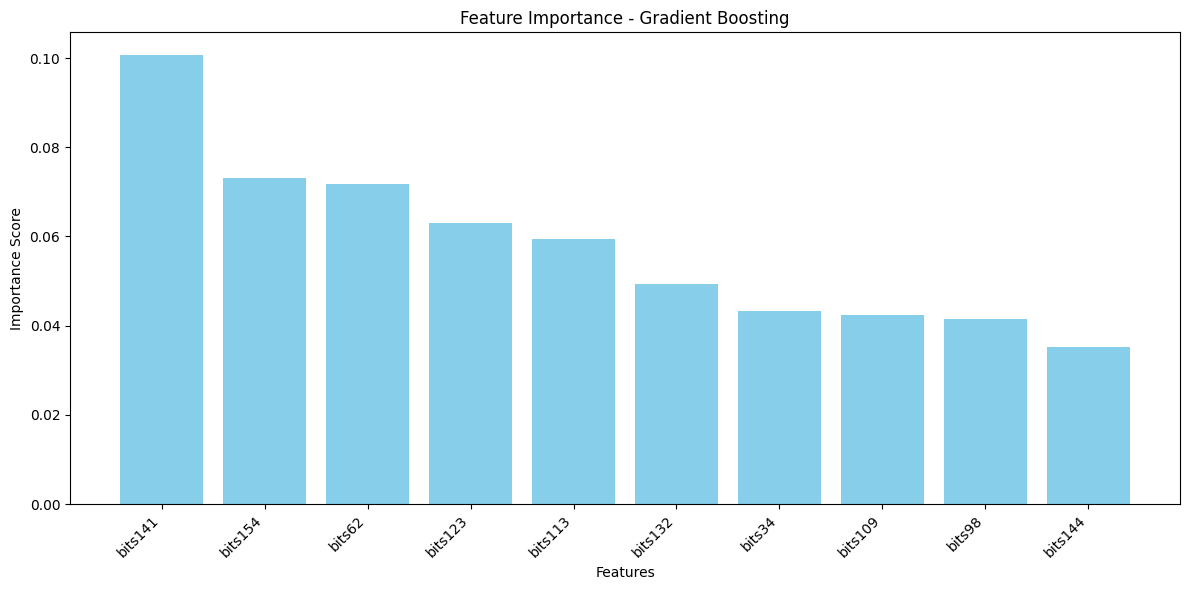

In [ ]:
import matplotlib.pyplot as plt

# Visualisasi 10 fitur teratas
plt.figure(figsize=(12, 6))
plt.title("Feature Importance - Gradient Boosting")
plt.bar(range(10), importances[indices[:10]], align="center", color="skyblue")
plt.xticks(range(10), [features[i] for i in indices[:10]], rotation=45, ha="right")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Feature Importance (MDI)')

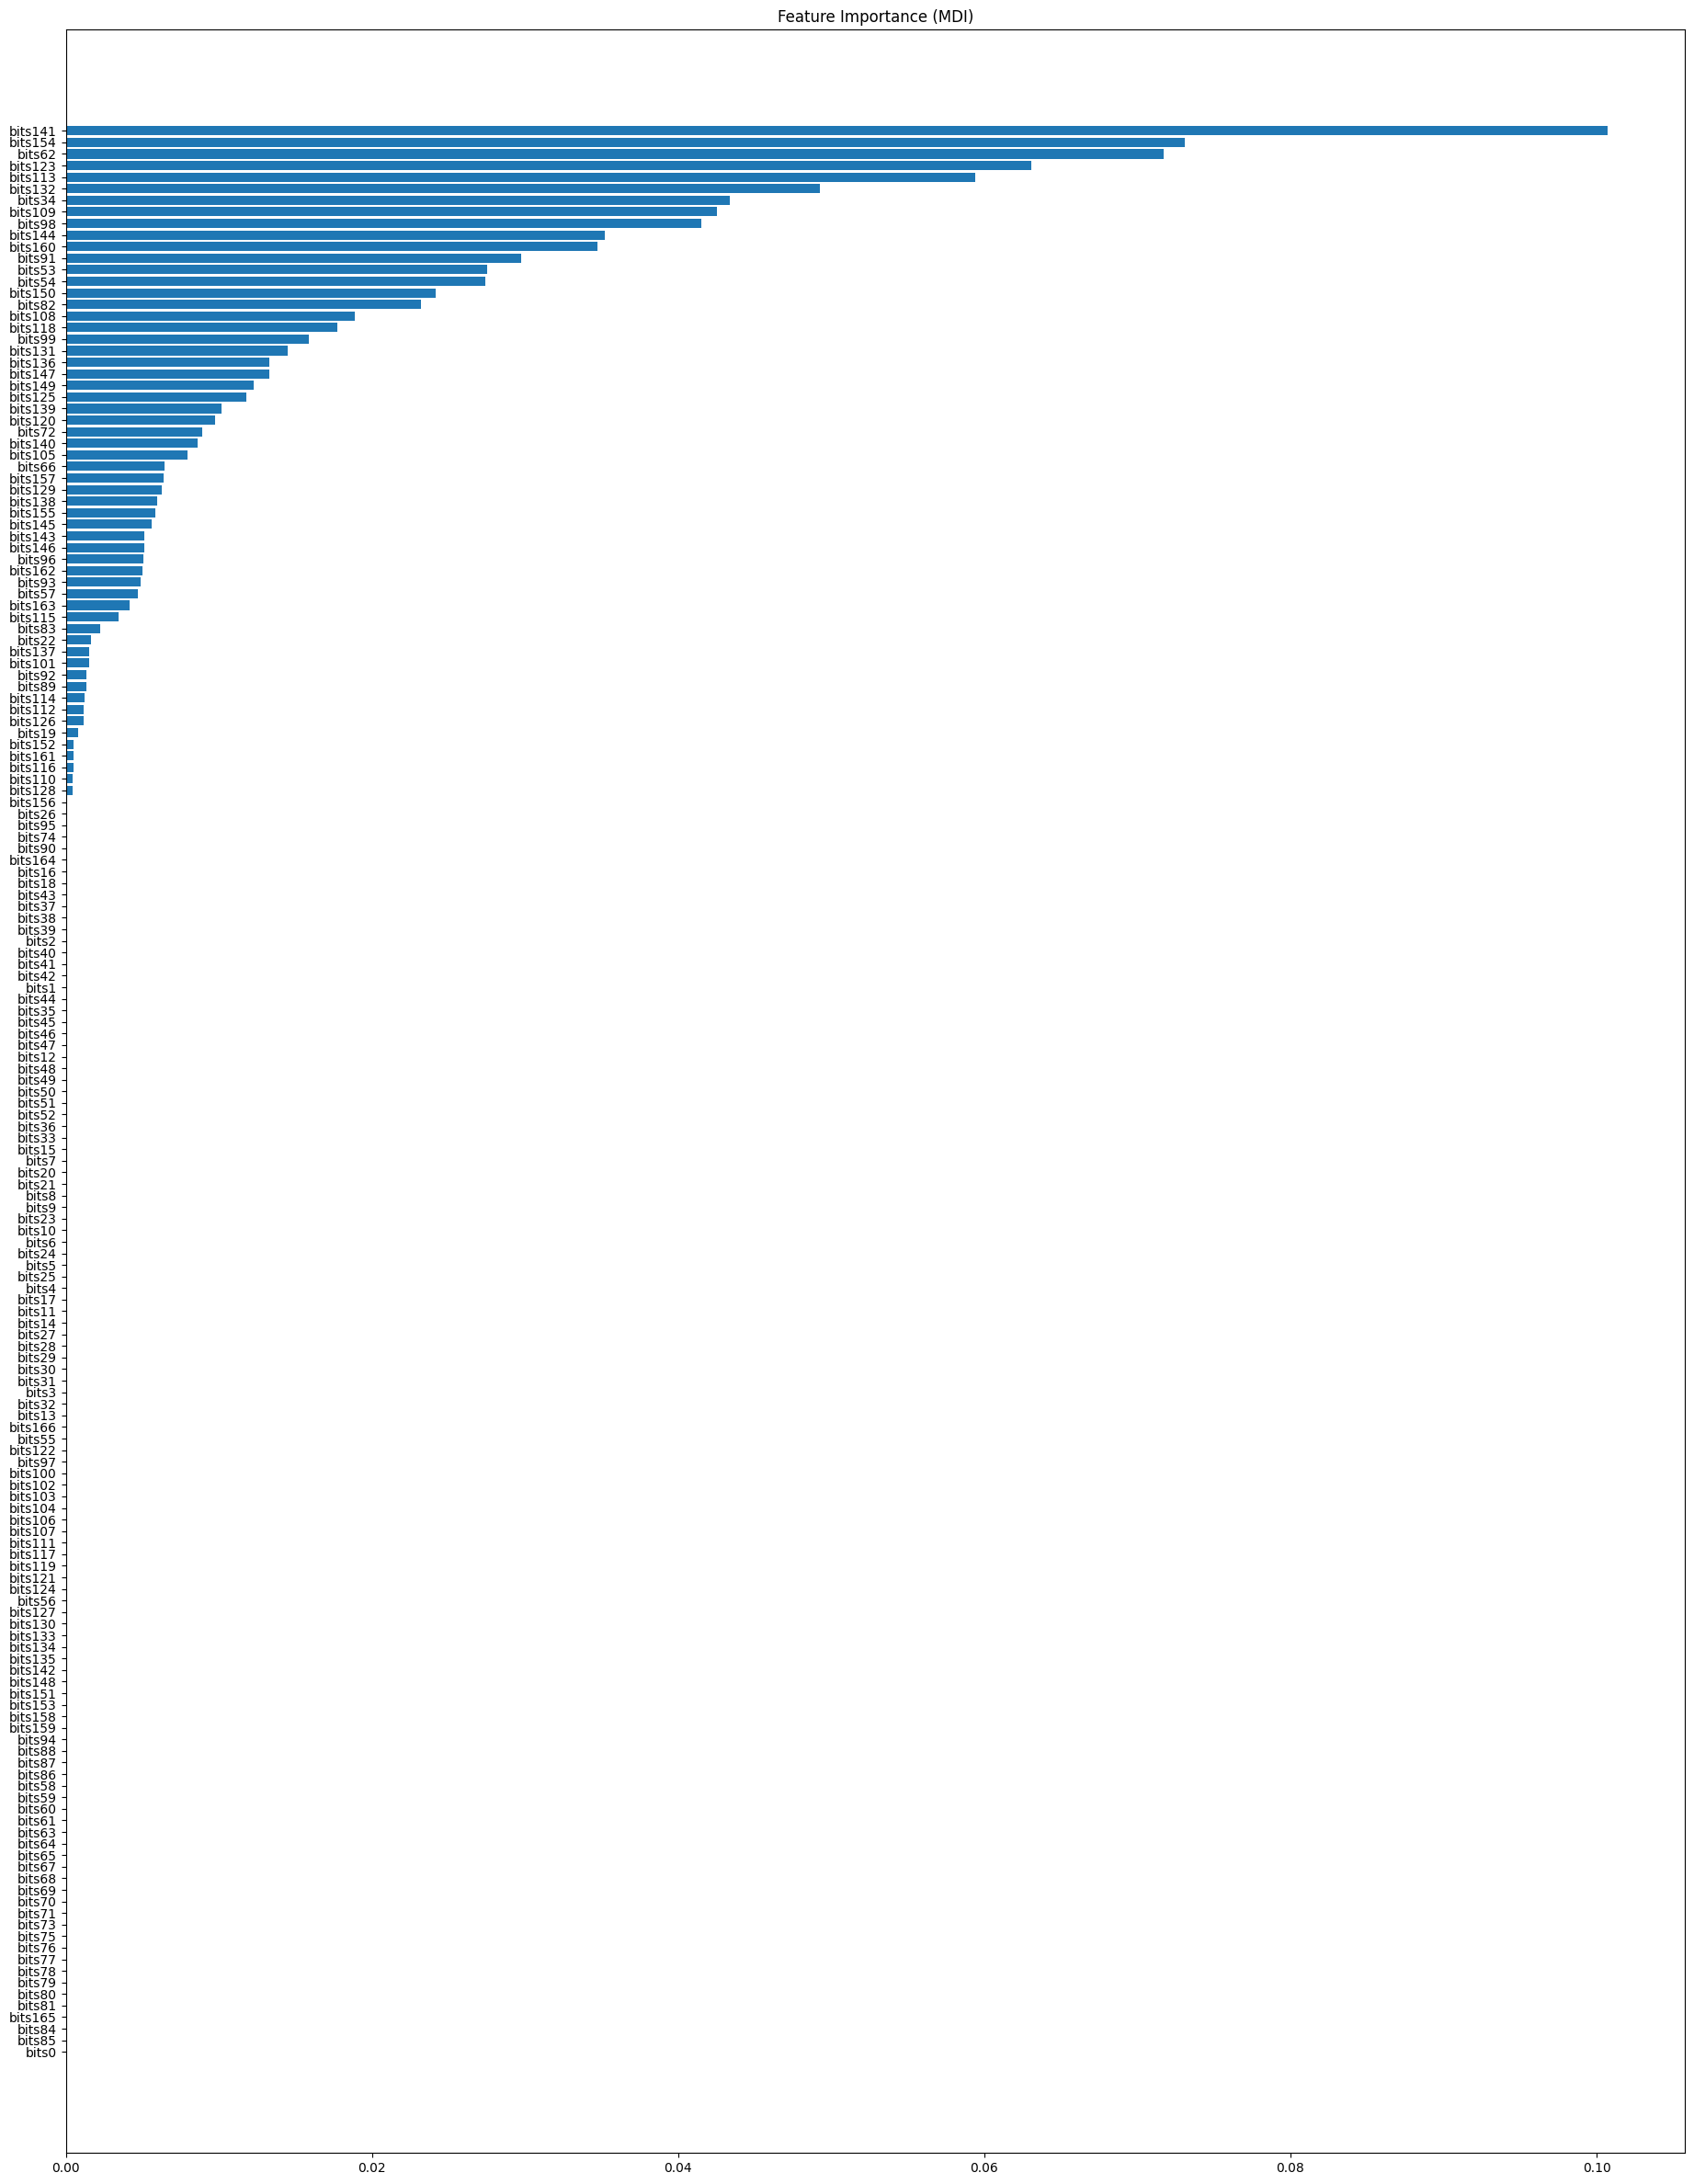

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# Model terbaik Anda (misalnya Gradient Boosting)
best_model = models['Gradient Boosting']  # Ganti dengan model terbaik Anda

# Mendapatkan nilai feature importance dari model
feature_importance = best_model.feature_importances_

# Mengurutkan fitur berdasarkan pentingnya
sorted_idx = np.argsort(feature_importance)

# Menentukan posisi untuk plot
pos = np.arange(sorted_idx.shape[0]) + 0.5

# Plot Feature Importance dari MDI (Mean Decrease Impurity)
fig = plt.figure(figsize=(50, 30))

plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, X_train.columns[sorted_idx])  # Menggunakan nama fitur dari X_train
plt.title("Feature Importance (MDI)")




<ipython-input-23-58d6271ee08e>:42: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(result.importances[sorted_idx_perm_top10].T, vert=False, labels=X_train.columns[sorted_idx_perm_top10])  # Ganti 'tick_labels' dengan 'labels'


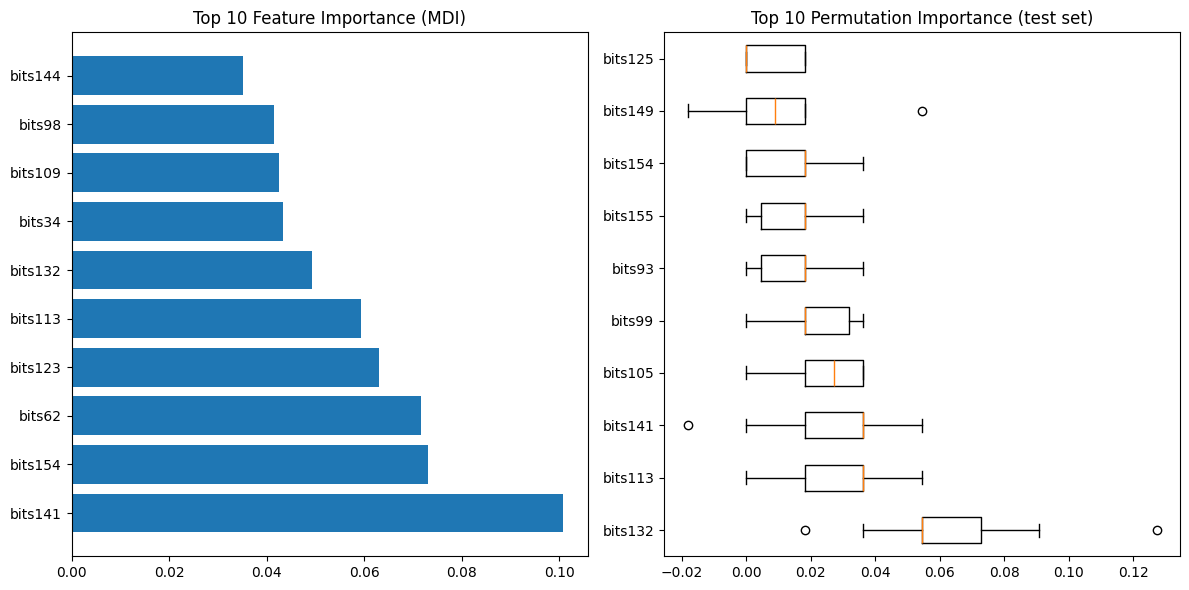

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# Model terbaik Anda (misalnya Gradient Boosting)
best_model = models['Gradient Boosting']  # Ganti dengan model terbaik Anda

# Mendapatkan nilai feature importance dari model
feature_importance = best_model.feature_importances_

# Mengurutkan fitur berdasarkan pentingnya
sorted_idx = np.argsort(feature_importance)[::-1]  # Urutkan dari terbesar ke terkecil

# Mengambil 10 fitur terpenting
top_n = 10
sorted_idx_top10 = sorted_idx[:top_n]

# Menentukan posisi untuk plot
pos = np.arange(top_n) + 0.5

# Plot Feature Importance dari MDI (Mean Decrease Impurity)
fig = plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx_top10], align="center")
plt.yticks(pos, X_train.columns[sorted_idx_top10])  # Menggunakan nama fitur dari X_train
plt.title("Top 10 Feature Importance (MDI)")

# Permutation Importance untuk mengukur dampak fitur
result = permutation_importance(
    best_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

# Mengurutkan importances dari Permutation Importance
sorted_idx_perm = result.importances_mean.argsort()[::-1]  # Urutkan dari terbesar ke terkecil

# Ambil 10 fitur teratas berdasarkan Permutation Importance
sorted_idx_perm_top10 = sorted_idx_perm[:top_n]

# Plot Permutation Importance
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx_perm_top10].T, vert=False, labels=X_train.columns[sorted_idx_perm_top10])  # Ganti 'tick_labels' dengan 'labels'
plt.title("Top 10 Permutation Importance (test set)")

# Menyesuaikan layout agar lebih rapi
fig.tight_layout()
plt.show()
